In [1]:
#import libraries for Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset by assining into variables
df=pd.read_excel('Losses.xlsx')

In [3]:
#Check the 5 records
df.head()

,DAY,MONTH,MONTH_ID,YEAR,CAUSE,GROSS INCURRED AMOUNT
0,1.0,January,1.0,1999.0,WINDSTORM,477.88
1,1.0,January,1.0,1999.0,FIRE,700.00
2,1.0,January,1.0,1999.0,WINDSTORM,99.87
3,1.0,January,1.0,1999.0,WINDSTORM,139.80
4,1.0,January,1.0,1999.0,WINDSTORM,548.66


In [4]:
#Check the No. of Rows and Columns in dataset
df.shape

(47565, 6)

In [5]:
#Here in dataset MONTH_ID is not Required as Month and MONTH_ID Refers the Same
df.drop('MONTH_ID',inplace=True,axis=1)


In [6]:
#Cross check  the dataset MONTH_ID has been deleted or not
df.head()

,DAY,MONTH,YEAR,CAUSE,GROSS INCURRED AMOUNT
0,1.0,January,1999.0,WINDSTORM,477.88
1,1.0,January,1999.0,FIRE,700.00
2,1.0,January,1999.0,WINDSTORM,99.87
3,1.0,January,1999.0,WINDSTORM,139.80
4,1.0,January,1999.0,WINDSTORM,548.66


In [7]:
#Check the Description of dataset with columns Properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47565 entries, 0 to 47564
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   DAY                    47565 non-null  float64
 1   MONTH                  47565 non-null  object 
 2   YEAR                   47565 non-null  float64
 3   CAUSE                  47565 non-null  object 
 4   GROSS INCURRED AMOUNT  47565 non-null  float64
dtypes: float64(3), object(2)
memory usage: 1.8+ MB


In [8]:
#Check for null values in dataset
df.isnull().sum()

#here Values in each Column

DAY                      0
MONTH                    0
YEAR                     0
CAUSE                    0
GROSS INCURRED AMOUNT    0
dtype: int64

In [9]:
#Cross check with data types for null values
df.dtypes

DAY                      float64
MONTH                     object
YEAR                     float64
CAUSE                     object
GROSS INCURRED AMOUNT    float64
dtype: object

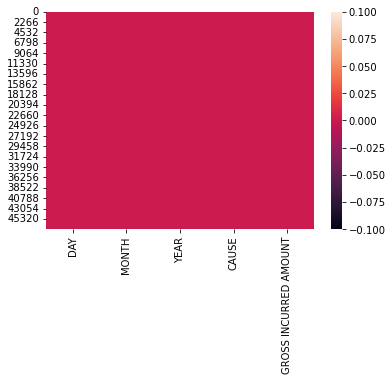

In [10]:
#Visualise for null values in dataset
sb.heatmap(df.isnull())
plt.show()

#Here no Null through Visualisation

In [ ]:
'''
Here We will not delete the duplicate values as there might be having similar policy claim amount on same time and same day
as the chances of calamities and harmness be on the same day itself


'''

In [11]:
#Here the for prediction through deep learning required the values in single units so we will apply LabelEncoder for Object types Columns
#Seperate the numeric and object type data
df_num=df.select_dtypes('float64')
df_cat=df.select_dtypes('object')

In [12]:
#Apply LabelEncoder on Categorical Columns
from sklearn.preprocessing import LabelEncoder   #Call class of LabelEncoder()
le=LabelEncoder()  #Create a variable for LabelEncoder()
columns=df_cat.columns
for col in columns:
  df_cat[col]=le.fit_transform(df_cat[col])

In [13]:
#Concate both Object type and Numeric Type Colunms
df_new=pd.concat([df_num,df_cat],axis=1)

In [14]:
#Check the Concated Data
df_new.head()

,DAY,YEAR,GROSS INCURRED AMOUNT,MONTH,CAUSE
0,1.0,1999.0,477.88,4,7
1,1.0,1999.0,700.00,4,3
2,1.0,1999.0,99.87,4,7
3,1.0,1999.0,139.80,4,7
4,1.0,1999.0,548.66,4,7


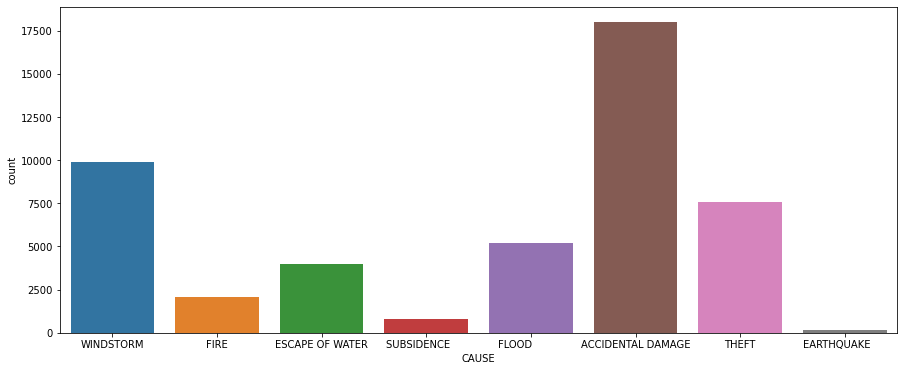

In [15]:
#Visualise types of Causes and check whether data is balanced or not, if not then we will have t0 balance data  
plt.figure(figsize=(15,6))
sb.countplot(data=df,x='CAUSE')
plt.show()

In [16]:
#select input and output
X=df_new.drop('CAUSE',axis=1)
Y=df_new['CAUSE']

In [17]:
#Split the data into 70% for training and 30% for Testing Ratio
from sklearn.model_selection import train_test_split  #Call model for train_test_split 
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1,stratify=Y)

In [18]:
#Apply StandardScaler for converting into single unit dataset values before prediction
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [19]:
#!pip install imblearn

In [20]:
#Now we perform data balancing as our dataset is unbalanced
from imblearn.over_sampling import SMOTE
#apply data balancing on training and testing data
X_train1,Y_train1=SMOTE().fit_resample(X_train,Y_train)
X_test1,Y_test1=SMOTE().fit_resample(X_test,Y_test)

#check data balancing
Y_test1.value_counts()

6    5398
0    5398
7    5398
4    5398
2    5398
3    5398
5    5398
1    5398
Name: CAUSE, dtype: int64

In [21]:
Y_train1.value_counts()

(7    12595
 3    12595
 4    12595
 0    12595
 2    12595
 6    12595
 5    12595
 1    12595
 Name: CAUSE, dtype: int64,)

In [22]:
#create user defined function as it easy to write run the model without writing 4 lines codes again and again 
def create_model(model):
    model.fit(X_train1,Y_train1)
    Y_pred=model.predict(X_test1)
    print(classification_report(Y_test1,Y_pred))
    print(confusion_matrix(Y_test1,Y_pred))
    return model

# Logistic Regression

In [23]:
#Train the model with LogisticRegression algorithm
from sklearn.linear_model import LogisticRegression                   #call the class
from sklearn.metrics import classification_report,confusion_matrix
lr=LogisticRegression(random_state=1)
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.23      0.34      0.27      5398
           1       0.72      0.92      0.81      5398
           2       0.26      0.49      0.34      5398
           3       0.22      0.05      0.08      5398
           4       0.26      0.47      0.33      5398
           5       0.41      0.39      0.40      5398
           6       0.17      0.02      0.04      5398
           7       0.10      0.02      0.03      5398

    accuracy                           0.34     43184
   macro avg       0.30      0.34      0.29     43184
weighted avg       0.30      0.34      0.29     43184

[[1862  346 1173   36 1321  399   96  165]
 [  43 4988    0    0  273   85    9    0]
 [1228  112 2663  180  415  568   83  149]
 [ 926  290 1808  256 1156  719   83  160]
 [1158  480  185  178 2546  521  155  175]
 [ 435  194 1047  320 1007 2126   91  178]
 [1346  394 1503  133 1406  357  118  141]
 [1257  163 1684   57 1724  349   51  113]]


# DecisionTree

In [24]:
#Train the model with DecisionTreeClassifier algorithm with Gini index 
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(random_state=1)
dtc=create_model(dtc)

              precision    recall  f1-score   support

           0       0.26      0.37      0.31      5398
           1       0.95      0.81      0.88      5398
           2       0.28      0.26      0.27      5398
           3       0.25      0.24      0.25      5398
           4       0.30      0.29      0.30      5398
           5       0.46      0.30      0.36      5398
           6       0.20      0.22      0.21      5398
           7       0.46      0.50      0.48      5398

    accuracy                           0.38     43184
   macro avg       0.40      0.38      0.38     43184
weighted avg       0.40      0.38      0.38     43184

[[2022   12  626  334  695  123  939  647]
 [ 159 4398   47  147  379  113  115   40]
 [1116   23 1414  729  283  358  946  529]
 [ 734   83  773 1319  620  649  742  478]
 [1084   10  327  634 1568  255  921  599]
 [ 658   87  528 1201  444 1622  519  339]
 [1334   10  762  641  702  239 1179  531]
 [ 752    8  510  309  466  176  482 2695]]


# Pruning technique with Gini Index

In [ ]:
#Maxdepth Gini index

In [25]:
#max_depth pruning technique on DecisionTreeClassifier with Gini index
#max depth= 9 gives best f1-score
dtc_max_depth=DecisionTreeClassifier(max_depth=8,random_state=1)
dtc_max_depth=create_model(dtc_max_depth)

              precision    recall  f1-score   support

           0       0.28      0.44      0.34      5398
           1       0.90      0.82      0.85      5398
           2       0.29      0.48      0.36      5398
           3       0.24      0.18      0.20      5398
           4       0.31      0.43      0.36      5398
           5       0.47      0.50      0.49      5398
           6       0.09      0.00      0.01      5398
           7       0.61      0.35      0.45      5398

    accuracy                           0.40     43184
   macro avg       0.40      0.40      0.38     43184
weighted avg       0.40      0.40      0.38     43184

[[2379   49 1291  272  836  266   42  263]
 [ 136 4411   29  146  537   80   19   40]
 [1048  149 2589  636  111  730   13  122]
 [ 809  115 1563  954  903  932   29   93]
 [1416    3  204  448 2340  442   27  518]
 [ 254   77  645  829  847 2706   26   14]
 [1609   65 1562  470 1252  236   17  187]
 [ 997   55 1106  266  744  320    8 1902]]


In [ ]:
#Min_sample_leaf with  Gini index

In [26]:
#apply min_samples_leaf pruning technique on DecisionTreeClassifier with Gini index
for i in range(45,101):
    dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=i,random_state=1)
    print('Min_samples_leaf :',i)
    dtc_min_leaf=create_model(dtc_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.31      0.27      0.29      5398
           1       0.94      0.84      0.89      5398
           2       0.31      0.36      0.34      5398
           3       0.24      0.28      0.26      5398
           4       0.32      0.37      0.34      5398
           5       0.40      0.44      0.42      5398
           6       0.19      0.14      0.16      5398
           7       0.56      0.50      0.53      5398

    accuracy                           0.40     43184
   macro avg       0.41      0.40      0.40     43184
weighted avg       0.41      0.40      0.40     43184

[[1464   22  871  534  912  307  785  503]
 [  35 4518   46  141  406  187   57    8]
 [ 566   40 1939  864  271  712  631  375]
 [ 408   77  956 1494  627 1017  541  278]
 [ 689   25  299  711 2002  591  593  488]
 [ 169   60  478 1333  569 2402  282  105]
 [ 985   37  956  874  993  403  764  386]
 [ 463   11  615  351  572

              precision    recall  f1-score   support

           0       0.30      0.26      0.28      5398
           1       0.93      0.84      0.88      5398
           2       0.30      0.35      0.32      5398
           3       0.24      0.27      0.25      5398
           4       0.31      0.40      0.35      5398
           5       0.43      0.47      0.45      5398
           6       0.20      0.14      0.16      5398
           7       0.58      0.49      0.53      5398

    accuracy                           0.40     43184
   macro avg       0.41      0.40      0.40     43184
weighted avg       0.41      0.40      0.40     43184

[[1403   18  920  541 1001  325  722  468]
 [  46 4526   45  135  391  190   57    8]
 [ 663   42 1887  866  271  699  633  337]
 [ 474   94 1064 1462  713  945  445  201]
 [ 601   43  284  742 2158  527  587  456]
 [ 140   69  518 1219  663 2532  176   81]
 [ 963   42  967  906 1073  376  738  333]
 [ 464   15  631  348  608  323  365 2644]]
Min_

              precision    recall  f1-score   support

           0       0.30      0.25      0.27      5398
           1       0.92      0.85      0.88      5398
           2       0.30      0.36      0.33      5398
           3       0.24      0.27      0.26      5398
           4       0.32      0.40      0.36      5398
           5       0.42      0.47      0.45      5398
           6       0.20      0.14      0.16      5398
           7       0.59      0.50      0.54      5398

    accuracy                           0.41     43184
   macro avg       0.41      0.41      0.41     43184
weighted avg       0.41      0.41      0.41     43184

[[1369   22  931  538 1036  320  720  462]
 [  46 4574   45  115  376  156   77    9]
 [ 646   22 1956  850  289  691  632  312]
 [ 445  121  985 1465  670 1017  506  189]
 [ 592   55  292  707 2158  541  578  475]
 [ 115  118  620 1178  570 2545  166   86]
 [ 945   49  969  884 1044  391  757  359]
 [ 404   11  649  348  603  336  365 2682]]
Min_

              precision    recall  f1-score   support

           0       0.29      0.27      0.28      5398
           1       0.92      0.85      0.88      5398
           2       0.31      0.37      0.34      5398
           3       0.24      0.25      0.24      5398
           4       0.32      0.42      0.36      5398
           5       0.43      0.48      0.45      5398
           6       0.20      0.13      0.15      5398
           7       0.59      0.49      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.41      0.41      0.41     43184
weighted avg       0.41      0.41      0.41     43184

[[1465   31  939  476 1030  337  678  442]
 [  69 4562   45  116  408  140   54    4]
 [ 707   40 2001  797  292  664  577  320]
 [ 461   80  993 1341  769 1053  499  202]
 [ 686   62  281  578 2268  568  519  436]
 [ 128  131  536 1105  612 2604  178  104]
 [1012   64 1006  821 1096  380  693  326]
 [ 474   15  671  331  600  323  354 2630]]
Min_

              precision    recall  f1-score   support

           0       0.29      0.27      0.28      5398
           1       0.92      0.84      0.88      5398
           2       0.31      0.38      0.34      5398
           3       0.24      0.23      0.23      5398
           4       0.31      0.40      0.35      5398
           5       0.42      0.50      0.46      5398
           6       0.20      0.14      0.16      5398
           7       0.58      0.48      0.53      5398

    accuracy                           0.40     43184
   macro avg       0.41      0.40      0.40     43184
weighted avg       0.41      0.40      0.40     43184

[[1463   26  990  426 1012  356  673  452]
 [  67 4526   46   83  431  207   34    4]
 [ 676   40 2034  705  288  711  610  334]
 [ 484   78 1049 1218  764 1062  498  245]
 [ 686   57  292  587 2150  606  582  438]
 [ 105  128  547 1020  600 2714  198   86]
 [1013   53 1018  743 1087  399  738  347]
 [ 496   15  668  331  618  341  315 2614]]
Min_

              precision    recall  f1-score   support

           0       0.29      0.28      0.29      5398
           1       0.91      0.84      0.87      5398
           2       0.31      0.38      0.34      5398
           3       0.24      0.21      0.23      5398
           4       0.31      0.41      0.36      5398
           5       0.44      0.53      0.48      5398
           6       0.21      0.12      0.16      5398
           7       0.58      0.49      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.41      0.41      0.41     43184
weighted avg       0.41      0.41      0.41     43184

[[1497   28 1007  402 1048  355  604  457]
 [  69 4526   51   69  409  214   39   21]
 [ 674   40 2076  731  284  692  571  330]
 [ 488   78 1104 1154  810 1086  436  242]
 [ 703   74  286  536 2239  593  517  450]
 [ 103  128  530  876  614 2872  190   85]
 [1066   53 1010  730 1121  392  674  352]
 [ 497   22  693  319  614  357  245 2651]]
Min_

              precision    recall  f1-score   support

           0       0.30      0.29      0.29      5398
           1       0.91      0.84      0.87      5398
           2       0.30      0.37      0.33      5398
           3       0.24      0.22      0.23      5398
           4       0.31      0.42      0.36      5398
           5       0.43      0.52      0.47      5398
           6       0.21      0.12      0.16      5398
           7       0.58      0.49      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.41      0.41      0.41     43184
weighted avg       0.41      0.41      0.41     43184

[[1565   28  977  428 1052  339  546  463]
 [  71 4526   47   58  446  192   38   20]
 [ 675   40 1972  828  286  753  536  308]
 [ 521   78 1023 1194  810 1099  428  245]
 [ 727   74  285  539 2284  546  501  442]
 [ 106  128  571  797  745 2794  186   71]
 [1050   53  993  771 1123  379  666  363]
 [ 506   22  662  369  625  329  263 2622]]
Min_

In [27]:
#Min samples leaf pruning technique on DecisionTreeClassifier with Gini index
#Min_samples_leaf= 83 gives best f1-score
dtc_min_leaf=DecisionTreeClassifier(min_samples_leaf=83,random_state=1)
dtc_min_leaf=create_model(dtc_min_leaf)

              precision    recall  f1-score   support

           0       0.30      0.27      0.28      5398
           1       0.92      0.84      0.88      5398
           2       0.31      0.39      0.35      5398
           3       0.24      0.22      0.23      5398
           4       0.31      0.40      0.35      5398
           5       0.43      0.50      0.46      5398
           6       0.20      0.13      0.16      5398
           7       0.58      0.49      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.41      0.41      0.41     43184
weighted avg       0.41      0.41      0.41     43184

[[1480   26  997  412 1039  340  639  465]
 [  67 4526   46   81  427  209   38    4]
 [ 655   40 2106  705  295  681  584  332]
 [ 497   78 1098 1203  781 1032  464  245]
 [ 673   50  275  591 2162  606  577  464]
 [ 102  128  554 1015  603 2704  206   86]
 [1020   53 1022  724 1109  386  715  369]
 [ 508   15  673  332  605  330  272 2663]]


In [28]:
#Pruning Technique Entropy

In [29]:
#Train the model with DecisionTreeClassifier algorithm with Entropy 
from sklearn.tree import DecisionTreeClassifier
dtc2=DecisionTreeClassifier(random_state=1,criterion='entropy')
dtc2=create_model(dtc2)

              precision    recall  f1-score   support

           0       0.27      0.38      0.31      5398
           1       0.95      0.82      0.88      5398
           2       0.28      0.26      0.27      5398
           3       0.24      0.25      0.25      5398
           4       0.32      0.30      0.31      5398
           5       0.46      0.32      0.38      5398
           6       0.20      0.21      0.20      5398
           7       0.46      0.50      0.48      5398

    accuracy                           0.38     43184
   macro avg       0.40      0.38      0.39     43184
weighted avg       0.40      0.38      0.39     43184

[[2035    9  619  316  702  131  934  652]
 [ 130 4405   27  425  180  121   90   20]
 [1120   28 1410  763  308  366  893  510]
 [ 644   57  788 1335  617  769  757  431]
 [1050   17  339  561 1640  274  902  615]
 [ 556   73  584 1084  525 1718  499  359]
 [1315   17  766  677  739  202 1129  553]
 [ 768    8  477  300  447  172  511 2715]]


In [ ]:
#Maxdepth with entropy

In [30]:
#apply max_depth pruning technique on DecisionTreeClassifier with Entropy
for i in range(1,9):
    dtc2_max_depth=DecisionTreeClassifier(max_depth=i,random_state=1,criterion='entropy')
    print('Max depth :',i)
    dtc2_max_depth=create_model(dtc2_max_depth)

Max depth : 1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      5398
           1       0.73      0.91      0.81      5398
           2       0.00      0.00      0.00      5398
           3       0.00      0.00      0.00      5398
           4       0.00      0.00      0.00      5398
           5       0.00      0.00      0.00      5398
           6       0.00      0.00      0.00      5398
           7       0.15      0.98      0.25      5398

    accuracy                           0.24     43184
   macro avg       0.11      0.24      0.13     43184
weighted avg       0.11      0.24      0.13     43184

[[   0  439    0    0    0    0    0 4959]
 [   0 4890    0    0    0    0    0  508]
 [   0  277    0    0    0    0    0 5121]
 [   0  254    0    0    0    0    0 5144]
 [   0  269    0    0    0    0    0 5129]
 [   0  143    0    0    0    0    0 5255]
 [   0  312    0    0    0    0    0 5086]
 [   0  101    0    0    0    0   

In [ ]:
#Min_sample_leaf with entropy

In [31]:
#apply min_samples_leaf pruning technique on DecisionTreeClassifier with Entropy
for i in range(45,101):
    dtc2_min_leaf=DecisionTreeClassifier(min_samples_leaf=i,random_state=1,criterion='entropy')
    print('Min_samples_leaf :',i)
    dtc2_min_leaf=create_model(dtc2_min_leaf)

Min_samples_leaf : 45
              precision    recall  f1-score   support

           0       0.31      0.28      0.29      5398
           1       0.92      0.84      0.88      5398
           2       0.30      0.36      0.33      5398
           3       0.24      0.28      0.26      5398
           4       0.31      0.40      0.35      5398
           5       0.45      0.46      0.45      5398
           6       0.21      0.14      0.17      5398
           7       0.60      0.49      0.54      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1486   11  928  533  965  260  796  419]
 [  39 4550   34  137  461  163   12    2]
 [ 587   32 1946  963  326  616  595  333]
 [ 450  128 1112 1511  674  937  401  185]
 [ 641   38  287  797 2150  454  614  417]
 [ 166  126  574 1030  741 2489  216   56]
 [ 938   28  976  846 1138  369  773  330]
 [ 481   11  675  428  578

              precision    recall  f1-score   support

           0       0.31      0.29      0.30      5398
           1       0.94      0.84      0.89      5398
           2       0.30      0.34      0.32      5398
           3       0.25      0.28      0.26      5398
           4       0.32      0.40      0.35      5398
           5       0.44      0.51      0.47      5398
           6       0.21      0.14      0.17      5398
           7       0.61      0.49      0.55      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1554   14  903  522  966  316  707  416]
 [  82 4529   18  129  442  182    9    7]
 [ 585   30 1830  933  346  703  646  325]
 [ 486   93 1050 1509  639 1023  442  156]
 [ 690   33  269  746 2138  511  597  414]
 [ 171   90  547  966  586 2750  231   57]
 [ 991   35  913  886 1072  394  777  330]
 [ 520    8  610  378  592  325  295 2670]]
Min_

              precision    recall  f1-score   support

           0       0.31      0.27      0.29      5398
           1       0.94      0.84      0.88      5398
           2       0.30      0.34      0.32      5398
           3       0.24      0.28      0.26      5398
           4       0.31      0.41      0.35      5398
           5       0.43      0.51      0.47      5398
           6       0.20      0.12      0.15      5398
           7       0.60      0.49      0.54      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1468   23  949  520 1019  327  697  395]
 [  82 4518   11  136  432  193    9   17]
 [ 581   30 1858  987  340  708  566  328]
 [ 395   93 1049 1508  662 1071  399  221]
 [ 654   37  247  736 2195  539  569  421]
 [ 114   55  570  951  687 2734  193   94]
 [ 918   51  908  961 1161  412  673  314]
 [ 504   10  592  391  642  339  287 2633]]
Min_

              precision    recall  f1-score   support

           0       0.31      0.27      0.29      5398
           1       0.95      0.84      0.89      5398
           2       0.31      0.36      0.33      5398
           3       0.24      0.26      0.25      5398
           4       0.31      0.42      0.36      5398
           5       0.42      0.52      0.46      5398
           6       0.20      0.12      0.15      5398
           7       0.59      0.49      0.54      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1479   25  964  507 1023  357  638  405]
 [  70 4518    7  141  442  182   21   17]
 [ 612   23 1933  983  321  733  470  323]
 [ 397   63 1020 1408  699 1170  371  270]
 [ 705    9  233  690 2278  583  514  386]
 [  78   52  580  988  672 2784  164   80]
 [ 908   58  949  895 1182  441  627  338]
 [ 515    6  609  348  647  361  273 2639]]
Min_

              precision    recall  f1-score   support

           0       0.31      0.27      0.29      5398
           1       0.95      0.84      0.89      5398
           2       0.30      0.36      0.33      5398
           3       0.23      0.27      0.25      5398
           4       0.31      0.41      0.35      5398
           5       0.43      0.53      0.47      5398
           6       0.20      0.10      0.14      5398
           7       0.59      0.48      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1472   25 1008  556 1022  362  558  395]
 [  70 4532    7  136  465  154   12   22]
 [ 535   14 1970  973  281  790  480  355]
 [ 382   49 1046 1453  712 1182  353  221]
 [ 727   14  287  793 2196  573  387  421]
 [  84   57  542  969  668 2857  133   88]
 [ 923   58  981  970 1143  446  552  325]
 [ 508    6  656  377  667  346  234 2604]]
Min_

              precision    recall  f1-score   support

           0       0.31      0.28      0.29      5398
           1       0.98      0.84      0.90      5398
           2       0.29      0.33      0.31      5398
           3       0.24      0.27      0.26      5398
           4       0.32      0.44      0.37      5398
           5       0.44      0.56      0.49      5398
           6       0.21      0.11      0.14      5398
           7       0.60      0.47      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1521   21  949  552 1028  394  537  396]
 [  70 4518    7   99  473  197   12   22]
 [ 620   14 1804 1067  252  820  524  297]
 [ 444   16 1018 1469  750 1181  337  183]
 [ 698    7  283  707 2401  516  358  428]
 [ 101    2  530  858  679 3016  149   63]
 [ 928   23  982  919 1248  412  582  304]
 [ 544    5  658  376  647  397  241 2530]]
Min_

              precision    recall  f1-score   support

           0       0.31      0.28      0.29      5398
           1       0.96      0.84      0.89      5398
           2       0.28      0.32      0.30      5398
           3       0.25      0.28      0.26      5398
           4       0.31      0.44      0.37      5398
           5       0.43      0.56      0.48      5398
           6       0.20      0.09      0.12      5398
           7       0.60      0.46      0.52      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1501   22 1017  520 1053  392  477  416]
 [  75 4518    7   81  487  200   12   18]
 [ 617   53 1751 1132  256  866  431  292]
 [ 410   32  981 1535  783 1199  310  148]
 [ 706    7  286  704 2385  560  329  421]
 [ 112   34  464  942  660 3016  118   52]
 [ 899   45 1003  929 1299  429  487  307]
 [ 533    5  659  394  664  424  231 2488]]
Min_

In [32]:
#Min samples leaf pruning technique on DecisionTreeClassifier with Entropy
#Min_samples_leaf=51 gives best recall = 0.80
dtc2_min_leaf=DecisionTreeClassifier(min_samples_leaf=51,random_state=1,criterion='entropy')
dtc2_min_leaf=create_model(dtc2_min_leaf)

              precision    recall  f1-score   support

           0       0.31      0.28      0.29      5398
           1       0.92      0.84      0.88      5398
           2       0.30      0.35      0.32      5398
           3       0.24      0.27      0.26      5398
           4       0.31      0.40      0.35      5398
           5       0.44      0.49      0.46      5398
           6       0.21      0.15      0.17      5398
           7       0.60      0.49      0.54      5398

    accuracy                           0.41     43184
   macro avg       0.42      0.41      0.41     43184
weighted avg       0.42      0.41      0.41     43184

[[1489   13  897  521 1018  271  755  434]
 [  51 4535   17  157  463  173    0    2]
 [ 547   31 1884  943  368  670  618  337]
 [ 489  117 1086 1466  648  999  410  183]
 [ 657   52  278  735 2149  493  610  424]
 [ 166  120  543  998  633 2631  220   87]
 [ 970   35  901  858 1121  381  795  337]
 [ 502    8  620  400  585  307  320 2656]]


# RandomForestClassifier

In [33]:
#train the model with RandomForestClassifier Algorithm
from sklearn.ensemble import RandomForestClassifier

In [ ]:
for i in range(10,101):
    rfc=RandomForestClassifier(n_estimators=i,random_state=1)
    print('No of decision Trees :',i)
    rfc=create_model(rfc)

No of decision Trees : 10
              precision    recall  f1-score   support

           0       0.27      0.41      0.33      5398
           1       0.96      0.82      0.88      5398
           2       0.31      0.32      0.31      5398
           3       0.27      0.28      0.28      5398
           4       0.32      0.33      0.33      5398
           5       0.49      0.37      0.42      5398
           6       0.20      0.19      0.20      5398
           7       0.55      0.50      0.52      5398

    accuracy                           0.40     43184
   macro avg       0.42      0.40      0.41     43184
weighted avg       0.42      0.40      0.41     43184

[[2202    8  596  290  748  112  887  555]
 [ 141 4404   12  188  411  163   68   11]
 [1121   14 1711  771  252  393  755  381]
 [ 630   73  970 1496  610  760  608  251]
 [1139   20  328  585 1792  282  779  473]
 [ 511   64  539 1228  495 1988  398  175]
 [1464   13  844  659  804  199 1023  392]
 [ 844    5  513  264 

              precision    recall  f1-score   support

           0       0.28      0.40      0.33      5398
           1       0.96      0.82      0.88      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.28      5398
           4       0.32      0.34      0.33      5398
           5       0.49      0.37      0.42      5398
           6       0.21      0.20      0.20      5398
           7       0.54      0.51      0.52      5398

    accuracy                           0.40     43184
   macro avg       0.43      0.40      0.41     43184
weighted avg       0.43      0.40      0.41     43184

[[2158    8  598  282  727  112  939  574]
 [ 125 4405    6  195  424  164   61   18]
 [1060   12 1705  785  268  392  784  392]
 [ 618   57  877 1561  596  815  632  242]
 [1094   13  300  584 1822  279  812  494]
 [ 465   72  525 1244  497 2011  399  185]
 [1420    8  837  634  807  198 1077  417]
 [ 770    5  505  275  475  158  481 2729]]
No o

              precision    recall  f1-score   support

           0       0.28      0.40      0.33      5398
           1       0.97      0.82      0.89      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.28      5398
           4       0.32      0.34      0.33      5398
           5       0.50      0.38      0.43      5398
           6       0.20      0.20      0.20      5398
           7       0.54      0.51      0.52      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.41     43184
weighted avg       0.43      0.41      0.41     43184

[[2147    7  604  287  729  107  936  581]
 [ 133 4402    6  190  434  152   62   19]
 [1037   12 1732  805  268  376  785  383]
 [ 586   45  891 1543  609  832  636  256]
 [1063   10  279  599 1842  273  813  519]
 [ 446   62  518 1238  509 2051  391  183]
 [1395    6  842  651  829  202 1053  420]
 [ 760    6  506  277  462  148  491 2748]]
No o

              precision    recall  f1-score   support

           0       0.28      0.40      0.33      5398
           1       0.97      0.82      0.88      5398
           2       0.32      0.32      0.32      5398
           3       0.27      0.28      0.28      5398
           4       0.33      0.35      0.34      5398
           5       0.50      0.38      0.43      5398
           6       0.20      0.19      0.20      5398
           7       0.54      0.51      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.41     43184
weighted avg       0.43      0.41      0.41     43184

[[2144    7  606  285  733  105  938  580]
 [ 142 4401   10  176  429  148   72   20]
 [1023   14 1736  828  258  371  788  380]
 [ 564   48  885 1527  615  846  638  275]
 [1060   10  278  591 1863  274  818  504]
 [ 461   64  510 1233  483 2069  391  187]
 [1398    9  841  651  830  208 1044  417]
 [ 745    7  502  286  461  150  483 2764]]
No o

              precision    recall  f1-score   support

           0       0.28      0.39      0.33      5398
           1       0.97      0.81      0.88      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.28      5398
           4       0.33      0.34      0.33      5398
           5       0.49      0.38      0.43      5398
           6       0.20      0.20      0.20      5398
           7       0.54      0.51      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.41     43184
weighted avg       0.43      0.41      0.41     43184

[[2122    8  599  285  744  106  951  583]
 [ 141 4398    7  181  424  154   69   24]
 [1048   11 1703  836  254  368  792  386]
 [ 543   45  881 1558  624  852  622  273]
 [1045   11  274  593 1849  282  827  517]
 [ 462   60  504 1234  486 2056  404  192]
 [1413    8  823  646  827  204 1067  410]
 [ 753    8  499  275  448  146  491 2778]]
No o

              precision    recall  f1-score   support

           0       0.28      0.40      0.33      5398
           1       0.97      0.81      0.88      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.29      5398
           4       0.33      0.34      0.34      5398
           5       0.50      0.39      0.44      5398
           6       0.21      0.20      0.20      5398
           7       0.54      0.52      0.53      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.42     43184
weighted avg       0.43      0.41      0.42     43184

[[2134    9  613  273  745  106  930  588]
 [ 143 4396    8  182  431  148   65   25]
 [1018   10 1713  822  257  370  810  398]
 [ 544   42  879 1564  612  859  615  283]
 [1047   11  271  587 1851  280  829  522]
 [ 463   57  505 1220  473 2087  401  192]
 [1419    8  817  645  817  200 1086  406]
 [ 742    8  496  281  454  147  484 2786]]
No o

              precision    recall  f1-score   support

           0       0.29      0.40      0.33      5398
           1       0.97      0.81      0.88      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.29      5398
           4       0.33      0.34      0.34      5398
           5       0.50      0.39      0.44      5398
           6       0.21      0.20      0.20      5398
           7       0.53      0.51      0.52      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.42     43184
weighted avg       0.43      0.41      0.42     43184

[[2151    8  604  271  739  104  941  580]
 [ 144 4398    8  176  426  155   66   25]
 [1021   10 1709  811  255  373  824  395]
 [ 545   43  884 1578  615  836  617  280]
 [1044   12  270  593 1856  274  822  527]
 [ 462   55  494 1212  480 2104  400  191]
 [1405    8  821  655  810  207 1072  420]
 [ 751    9  508  277  451  147  482 2773]]
No o

              precision    recall  f1-score   support

           0       0.29      0.40      0.33      5398
           1       0.97      0.81      0.88      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.29      5398
           4       0.33      0.34      0.34      5398
           5       0.50      0.39      0.44      5398
           6       0.20      0.20      0.20      5398
           7       0.53      0.52      0.52      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.42     43184
weighted avg       0.43      0.41      0.42     43184

[[2142    8  609  271  736  101  938  593]
 [ 143 4396    7  176  433  155   63   25]
 [1016    9 1710  822  247  370  826  398]
 [ 548   41  877 1581  620  839  621  271]
 [1038   12  263  591 1858  274  838  524]
 [ 461   57  487 1223  470 2094  405  201]
 [1411   10  821  656  816  209 1053  422]
 [ 744    9  503  278  460  146  477 2781]]
No o

              precision    recall  f1-score   support

           0       0.29      0.40      0.33      5398
           1       0.97      0.81      0.89      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.29      5398
           4       0.33      0.35      0.34      5398
           5       0.50      0.39      0.44      5398
           6       0.20      0.20      0.20      5398
           7       0.53      0.51      0.52      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.42     43184
weighted avg       0.43      0.41      0.42     43184

[[2145    7  598  271  740  102  933  602]
 [ 141 4396   10  173  435  154   64   25]
 [1015    9 1705  816  253  374  826  400]
 [ 550   36  874 1576  625  842  613  282]
 [1038   11  276  588 1865  273  829  518]
 [ 459   56  497 1220  472 2092  400  202]
 [1419    8  807  659  822  205 1063  415]
 [ 740    7  505  282  464  145  481 2774]]
No o

              precision    recall  f1-score   support

           0       0.29      0.40      0.33      5398
           1       0.97      0.81      0.89      5398
           2       0.32      0.32      0.32      5398
           3       0.28      0.29      0.29      5398
           4       0.33      0.34      0.34      5398
           5       0.50      0.39      0.44      5398
           6       0.20      0.20      0.20      5398
           7       0.53      0.51      0.52      5398

    accuracy                           0.41     43184
   macro avg       0.43      0.41      0.42     43184
weighted avg       0.43      0.41      0.42     43184

[[2148    7  602  270  750   98  931  592]
 [ 142 4396   10  169  423  155   77   26]
 [1014   11 1705  821  254  373  823  397]
 [ 552   36  867 1579  617  857  619  271]
 [1035   11  281  593 1859  280  824  515]
 [ 451   58  494 1204  478 2103  406  204]
 [1410    8  812  661  824  202 1060  421]
 [ 741    7  507  284  462  147  471 2779]]
No o

In [ ]:
#RandomForestClassifier Algorithm
#No of decision Trees=17 gives value of recall 0.63 
rfc=RandomForestClassifier(n_estimators=17,random_state=1)
rfc=create_model(rfc)

In [ ]:
#Apply max_depth pruning on RandomForestClassifier Algorithm
for i in range(1,9):
    rfc_max_depth=RandomForestClassifier(n_estimators=17,random_state=1,max_depth=i)
    print('Max depth :',i)
    rfc_max_depth=create_model(rfc_max_depth)

In [ ]:
#max_depth pruning on RandomForestClassifier Algorithm
#Max depth = 3 gives best recall 0.83
rfc_max_depth=RandomForestClassifier(n_estimators=17,random_state=1,max_depth=3)
rfc_max_depth=create_model(rfc_max_depth)

In [ ]:
#Apply min_samples_leaf pruning on RandomForestClassifier Algorithm
for i in range(45,101):
    rfc_min_leaf=RandomForestClassifier(n_estimators=17,random_state=1,min_samples_leaf=i)
    print('Min_samples_leaf :',i)
    rfc_min_leaf=create_model(rfc_min_leaf)

In [ ]:
#min_samples_leaf pruning on RandomForestClassifier Algorithm
#min_samples_leaf = 52 gives best recall 0.81
rfc_min_leaf=RandomForestClassifier(n_estimators=17,random_state=1,min_samples_leaf=52)
rfc_min_leaf=create_model(rfc_min_leaf)

# AdaBoostClassifier

In [ ]:
#Apply ADABoostClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
for i in range(1,20):
    abc=AdaBoostClassifier(n_estimators=i,random_state=1)
    print('No of Decision stumps:',i)
    abc=create_model(abc)

In [ ]:
#ADABoostClassifier
#No of decision stump=6 gives best recall 0.85
abc=AdaBoostClassifier(n_estimators=6,random_state=1)
abc=create_model(abc)

# GradientBoostClassifier

In [45]:
#Apply GradientBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [46]:
for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No of decision tree:',i)
    gbc=create_model(gbc)

No of decision tree: 10
              precision    recall  f1-score   support

           0       0.27      0.39      0.32      5398
           1       0.98      0.88      0.93      5398
           2       0.28      0.54      0.37      5398
           3       0.31      0.09      0.14      5398
           4       0.32      0.50      0.39      5398
           5       0.45      0.55      0.50      5398
           6       0.18      0.00      0.01      5398
           7       0.52      0.33      0.41      5398

    accuracy                           0.41     43184
   macro avg       0.41      0.41      0.38     43184
weighted avg       0.41      0.41      0.38     43184

[[2098   28 1361   72  999  429    3  408]
 [ 130 4767   19   39  332   92   18    1]
 [1021   12 2900  217  193  712   18  325]
 [ 799    5 1996  475 1139  793   18  173]
 [1286    4  220  151 2709  702    2  324]
 [ 193    8  745  347 1023 2964    3  115]
 [1451   23 1732  134 1435  306   16  301]
 [ 775    6 1458   86  7

KeyboardInterrupt: 

In [ ]:
for i in range(10,101):
    gbc=GradientBoostingClassifier(n_estimators=i,random_state=1)
    print('No of decision tree:',i)
    gbc=create_model(gbc)#GradientBoostingClassifier
#Number of Decision Tree=12
gbc=GradientBoostingClassifier(n_estimators=12,random_state=1)
gbc=create_model(gbc)

# XtremeGradientBoostClassifier

In [47]:
#Apply XtremeGradientBoostClassifier
from xgboost import XGBClassifier

In [48]:
for i in range(10,101):
    xgb=XGBClassifier(n_estimators=i,random_state=1)
    print('No of decision tree:',i)
    xgb=create_model(xgb)

No of decision tree: 10
              precision    recall  f1-score   support

           0       0.32      0.38      0.35      5398
           1       0.94      0.82      0.88      5398
           2       0.32      0.51      0.39      5398
           3       0.32      0.24      0.27      5398
           4       0.34      0.54      0.41      5398
           5       0.47      0.54      0.50      5398
           6       0.24      0.02      0.04      5398
           7       0.66      0.45      0.54      5398

    accuracy                           0.44     43184
   macro avg       0.45      0.44      0.42     43184
weighted avg       0.45      0.44      0.42     43184

[[2067   15 1341  142 1144  293   71  325]
 [ 172 4417   23  146  481  156    3    0]
 [ 792   45 2765  556  230  746   76  188]
 [ 486   70 1267 1300  940 1122   82  131]
 [1021   13  209  369 2917  435   61  373]
 [ 100   76  435 1006  768 2925   63   25]
 [1254   41 1623  397 1461  242  132  248]
 [ 644    3 1002  161  7

              precision    recall  f1-score   support

           0       0.35      0.40      0.37      5398
           1       0.96      0.82      0.88      5398
           2       0.32      0.51      0.40      5398
           3       0.33      0.29      0.31      5398
           4       0.36      0.54      0.43      5398
           5       0.49      0.59      0.54      5398
           6       0.29      0.04      0.06      5398
           7       0.66      0.47      0.55      5398

    accuracy                           0.46     43184
   macro avg       0.47      0.46      0.44     43184
weighted avg       0.47      0.46      0.44     43184

[[2151   11 1304  128 1130  246  104  324]
 [ 128 4426   60  168  429  167    7   13]
 [ 666   22 2751  726  227  712   75  219]
 [ 375   54 1182 1563  824 1238   66   96]
 [ 858   14  258  444 2931  421  109  363]
 [  98   61  385 1036  553 3189   50   26]
 [1175   25 1596  514 1416  235  196  241]
 [ 639    5  971  191  736  283   62 2511]]
No o

              precision    recall  f1-score   support

           0       0.38      0.42      0.40      5398
           1       0.97      0.82      0.89      5398
           2       0.33      0.49      0.39      5398
           3       0.32      0.33      0.32      5398
           4       0.36      0.52      0.43      5398
           5       0.50      0.59      0.55      5398
           6       0.30      0.06      0.10      5398
           7       0.66      0.48      0.56      5398

    accuracy                           0.46     43184
   macro avg       0.48      0.46      0.45     43184
weighted avg       0.48      0.46      0.45     43184

[[2283   10 1216  120 1085  188  150  346]
 [ 149 4425   37  200  398  176    2   11]
 [ 596   20 2619  918  224  653  149  219]
 [ 341   42 1042 1770  750 1238  104  111]
 [ 795   15  233  571 2814  412  178  380]
 [  83   43  385 1119  469 3208   75   16]
 [1149   22 1451  632 1334  227  330  253]
 [ 633    5  894  216  695  251   94 2610]]
No o

              precision    recall  f1-score   support

           0       0.41      0.46      0.43      5398
           1       0.96      0.82      0.89      5398
           2       0.34      0.47      0.39      5398
           3       0.32      0.34      0.33      5398
           4       0.37      0.51      0.43      5398
           5       0.51      0.60      0.55      5398
           6       0.30      0.08      0.12      5398
           7       0.66      0.50      0.57      5398

    accuracy                           0.47     43184
   macro avg       0.49      0.47      0.46     43184
weighted avg       0.49      0.47      0.46     43184

[[2467   10 1067  102 1028  172  195  357]
 [ 140 4415   44  217  378  183   10   11]
 [ 541   19 2545  981  242  635  200  235]
 [ 313   37 1022 1853  707 1214  141  111]
 [ 736   16  245  606 2766  430  217  382]
 [  93   57  397 1103  390 3265   78   15]
 [1118   20 1358  661 1329  239  422  251]
 [ 593    5  852  229  669  246  130 2674]]
No o

KeyboardInterrupt: 

In [49]:
#XtremeGradientBoostClassifier
#Number of Decision Tree=12
xgb=XGBClassifier(n_estimators=43,random_state=1)
xgb=create_model(xgb)

              precision    recall  f1-score   support

           0       0.42      0.48      0.45      5398
           1       0.96      0.82      0.88      5398
           2       0.35      0.46      0.40      5398
           3       0.32      0.35      0.33      5398
           4       0.37      0.51      0.43      5398
           5       0.51      0.60      0.55      5398
           6       0.30      0.09      0.14      5398
           7       0.66      0.50      0.57      5398

    accuracy                           0.48     43184
   macro avg       0.49      0.48      0.47     43184
weighted avg       0.49      0.48      0.47     43184

[[2567   11  957  110  987  155  231  380]
 [ 109 4421   58  223  377  181   18   11]
 [ 564   21 2497 1000  228  644  213  231]
 [ 310   41  976 1892  692 1217  160  110]
 [ 726   18  247  617 2750  431  250  359]
 [ 101   65  388 1129  376 3225   95   19]
 [1141   17 1301  694 1275  246  475  249]
 [ 620    6  796  236  649  242  163 2686]]


# Support Vector Machine 

In [ ]:
#Apply Support Vector Machine algorithm with hard margin
from sklearn.svm import LinearSVC
svc=LinearSVC(random_state=1)
svc=create_model(svc)

In [ ]:
#Apply Support Vector Machine algorithm with soft margin
svc1=LinearSVC(random_state=1,C=0.9)
svc1=create_model(svc1)

In [ ]:
#Apply Support Vector Machine algorithm with soft margin
svc1=LinearSVC(random_state=1,C=0.9)
svc1=create_model(svc1)

In [ ]:
#Apply Support Vector Machine algorithm for non linear data with radial basis kernel function
r_svc=SVC(random_state=1,kernel='rbf')
r_svc=create_model(r_svc)

In [ ]:
'''
Note - 

From Extreme Gradient Boosting(XGB) we found and an accuracy of 48% 
so, this is the best model for the dataset 
'''

In [ ]:
'''
Q4. Write a ML/DL program which takes the data as input and predicts the most probable peril even which can happen in next year. 
The model should come with proper accuracy assessment of the model.

'''

In [ ]:
'''
Conclusion :-

The most probable peril even which can happen in next year Would be from as the accuracy percentage has as an 88% chances

'''